In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from plot_helpers.core_plot_function import *

In [22]:
mat_fname = "schur_schanks_mode_convertor.mat"
mat_contents = sio.loadmat(mat_fname)

mat_baseline = sio.loadmat("../data/baseline_mode_convertor.mat")
mat_scan = sio.loadmat("../data/baseline_alpha_scan.mat")

In [96]:
print(mat_contents.keys(), mat_scan.keys())
alpha_baseline = mat_scan['obj_alpha']

objective_history =mat_contents['Objective'].toarray();
objective_base = mat_baseline['Objective'].toarray();
eps_r = mat_contents['eps_str']
eps_r_base = mat_baseline['eps_str']
N = np.squeeze(mat_contents['N'])
xrange = np.squeeze(mat_contents['xrange'])
yrange = np.squeeze(mat_contents['yrange'])
Npml = np.squeeze(mat_contents['Npml'])
alphamax = mat_contents['alphamax']
#print(type(objective_history), type(alphamax),objective_history.shape)
print(alpha_baseline[0][3])

dict_keys(['__header__', '__version__', '__globals__', 'N', 'Npml', 'Objective', 'alphamax', 'dEz_for', 'dHx_for', 'dHy_for', 'eEz', 'eps_str', 'xrange', 'yrange']) dict_keys(['__header__', '__version__', '__globals__', 'obj_alpha'])
  (0, 0)	2.164666231768712e-12
  (0, 1)	0.11078911782903064
  (0, 2)	0.2987686972733018
  (0, 3)	0.44091913349397227
  (0, 4)	0.5429261977448903
  (0, 5)	0.6178238573543314
  (0, 6)	0.6759135760804262
  (0, 7)	0.7223882390815568
  (0, 8)	0.759630667475351
  (0, 9)	0.7893929947227687
  (0, 10)	0.8130542069104025
  (0, 11)	0.8319955544665754
  (0, 12)	0.8471633322196411
  (0, 13)	0.8596271527971796
  (0, 14)	0.8693696760037409
  (0, 15)	0.8769647477757185
  (0, 16)	0.8551433347793721
  (0, 17)	0.8584494934572897
  (0, 18)	0.8531012516379919
  (0, 19)	0.8697016519373391
  (0, 20)	0.8577412337561366
  (0, 21)	0.8729931297871867
  (0, 22)	0.8681965537637671
  (0, 23)	0.8775457284706192
  (0, 24)	0.8748368612794108
  :	:
  (0, 125)	0.9333244722432923
  (0, 126)	

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


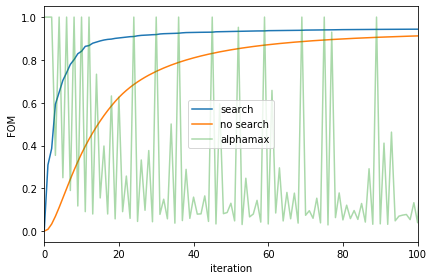

0
1
2
3
4
5
6


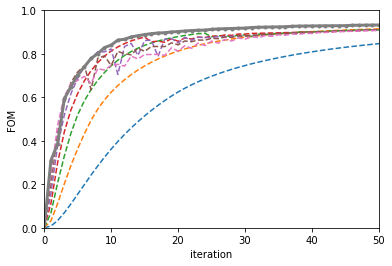

In [82]:
plt.figure(figsize = (6,4));
plt.plot(np.squeeze(objective_history))
plt.plot(np.squeeze(objective_base))
plt.plot(np.squeeze(alphamax),alpha = 0.4)
plt.legend(('search','no search', 'alphamax'))
plt.xlabel('iteration')
plt.ylabel('FOM')
plt.tight_layout();
plt.xlim(0,100)

plt.savefig('iteration_demo.png',dpi = 300)
plt.savefig('iteration_demo.eps',format = 'eps')

plt.show();
plt.figure();
for i in range(len(alpha_baseline[0])):
    print(i)
    plt.plot(np.squeeze(alpha_baseline[0][i].toarray()), '--')
    if(i>5):
        break;
plt.plot(np.squeeze(objective_history), '.-', linewidth = 3)

plt.xlim(0,50)
plt.xlabel('iteration')
plt.ylabel('FOM')
plt.ylim(0,1)

plt.show();

## Timing Comparison

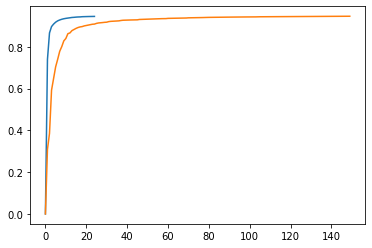

In [78]:
plt.plot(np.squeeze(objective_history[0,0::6]))
plt.plot(np.squeeze(objective_history[0,:]))
# plt.plot(np.squeeze(objective_base))

## Numerical Timing


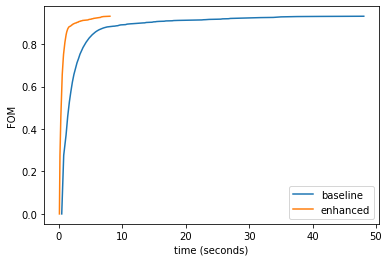

In [19]:
mat_baseline = sio.loadmat("../data/shanks_mode_convertor_baseline_timing.mat")
mat_schur = sio.loadmat("../data/shanks_schur_mode_convertor_timing.mat")

objective_history = np.squeeze(mat_baseline['Objective'].toarray());
objective_base = np.squeeze(mat_schur['Objective'].toarray());

timer_base =np.cumsum(np.squeeze(mat_baseline['timer']))
timer_ss =np.cumsum(np.squeeze(mat_schur['timer']))

plt.plot(timer_base,objective_history)
plt.plot(timer_ss,objective_history)
plt.legend(('baseline', 'enhanced'))
plt.xlabel('time (seconds)')
plt.ylabel('FOM')
plt.savefig('timing_demo.png',dpi = 300)

In [20]:
## plot of system specs

[141 141] [30 30] [-3.525  3.525] [-3.525  3.525]
[0.05] [1.5] [30 30] [141 141]


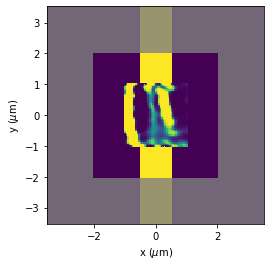

In [88]:
print(N,Npml, xrange, yrange)

X,Y =np.meshgrid(np.linspace(xrange[0],xrange[1],N[0]), np.linspace(yrange[0], yrange[1], N[1]))

dr = np.diff(xrange)/N[0]

Lpml = dr*Npml[0]
print(dr,Lpml, Npml,N)
L = N[0]*dr

plt.figure();
ax = plt.subplot(111)
plt.pcolormesh(Y,X, eps_r)
ax.set_aspect('equal')

from matplotlib.patches import Rectangle

currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((xrange[0]+Lpml, yrange[0]+Lpml),
#                       4,4, fill=None, alpha=1, edgecolor = 'grey', lw = 1))
currentAxis.add_patch(Rectangle((xrange[0], yrange[0]),
                      L,Lpml, facecolor = 'grey', alpha = 0.8))
currentAxis.add_patch(Rectangle((xrange[0], yrange[1]-Lpml),
                      L,Lpml, facecolor = 'grey', alpha = 0.8))
currentAxis.add_patch(Rectangle((xrange[0], yrange[0]+Lpml),
                      Lpml,L-2*Lpml, facecolor = 'grey', alpha = 0.8))
currentAxis.add_patch(Rectangle((xrange[1]-Lpml, yrange[0]+Lpml),
                      Lpml,L-2*Lpml, facecolor = 'grey', alpha = 0.8))

plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.savefig('demo_eps.png',dpi = 300)

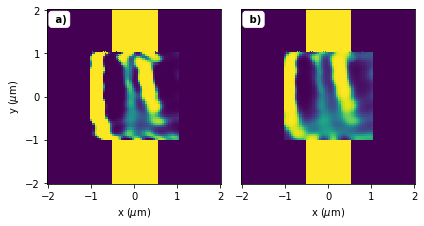

In [113]:
## side by side
plt.figure();
ax = plt.subplot(121)
plt.pcolormesh(Y,X, eps_r)
ax.set_aspect('equal')
plt.xlim(xrange[0]+Lpml, xrange[1]-Lpml)
plt.ylim(xrange[0]+Lpml, xrange[1]-Lpml)
ax.set_aspect('equal')
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
ax2 = plt.subplot(122)
plt.pcolormesh(Y,X, eps_r_base)
plt.xlim(xrange[0]+Lpml, xrange[1]-Lpml)
plt.ylim(xrange[0]+Lpml, xrange[1]-Lpml)
ax2.set_aspect('equal')
ax2.set_yticks([])
plt.tight_layout()
apply_sublabels([ax, ax2])
plt.xlabel('x ($\mu$m)')
plt.savefig('comparison_structure.png',dpi=300)


## domain scan

In [151]:
mat_scan = sio.loadmat("../data/schur_mode_convertor_scan_data.mat")
print(mat_scan.keys())

# ##     data{scan_counter,1} = alphamax;
#     data{scan_counter,2} = Objective;
#     data{scan_counter, 3} = timer;
#     data{scan_counter,4} = schur_time;
#     data{scan_counter,5} = Aschur;
#     data{scan_counter,6} = ls;

limit_scan = np.squeeze(mat_scan['limit_scan'])
print(limit_scan)

## test size of xxopt
xxopt= mat_scan['XXopt']
print(xxopt.shape)

dict_keys(['__header__', '__version__', '__globals__', 'A', 'Abase', 'Aconj', 'Aconjorder', 'App', 'Apv', 'Aschur', 'At', 'Avp', 'Avv', 'Ez_adj', 'Ez_for', 'Ez_for_old', 'Ez_inc', 'Ez_mode', 'Ez_proj', 'Ezf', 'FF', 'GGG', 'GGauto', 'Hx_adj', 'Hx_for', 'Hx_for_old', 'Hx_inc', 'Hx_mode', 'Hxf', 'Hy_adj', 'Hy_for', 'Hy_for_old', 'Hy_inc', 'Hy_mode', 'Hyf', 'ITERS', 'L0', 'Lpml', 'M', 'Mz', 'Mz_adj', 'Mz_for', 'N', 'N0', 'N_order', 'Npml', 'Nx', 'Ny', 'Objective', 'Pinc', 'Pmode', 'Q', 'S', 'SEz', 'SHx', 'SHy', 'SymA', 'SymB', 'SymB_adj', 'TT0b', 'TTmode1', 'TTmode2', 'TTopt', 'TimeShanks', 'UUUint', 'VVVint', 'WW', 'WWW', 'XX', 'XX0', 'XX0b', 'XXopt', 'YY', 'YY0', 'YY0b', 'YYopt', 'Z0', 'alphafix', 'alphamax', 'alphav', 'ans', 'b', 'b_adj', 'binaire', 'bls', 'bmod', 'bmod_adj', 'bmod_bls', 'bp', 'bp_adj', 'bt', 'bv', 'bv_adj', 'bv_bls', 'cptbinaire', 'dEz_for', 'dEz_for_old', 'dEz_for_schur', 'dFOM', 'dHx_for', 'dHx_for_old', 'dHx_for_schur', 'dHy_for', 'dHy_for_old', 'dHy_for_schur', 'dL

(15, 6)


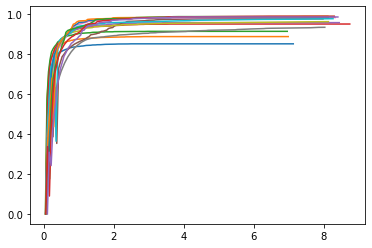

(0, 10)

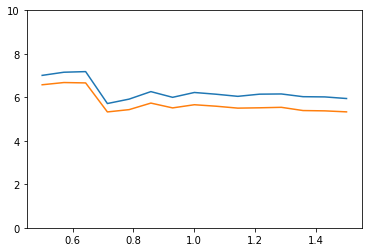

In [149]:
data = mat_scan['data']
print(data.shape)

timing_scan_data = []
for i in range(15):
    time_obj = np.cumsum(np.squeeze(data[i,2]))
    obj = np.squeeze(data[i, 1].toarray())
    #print(obj)
    plt.plot(time_obj,obj)
    schur_time = data[i,3][0][0]
    total_time = time_obj[-1]
    timing_scan_data.append([total_time, total_time+schur_time])
    
plt.show();

timing_scan_data = np.array(timing_scan_data)

plt.figure();
plt.plot(limit_scan, 50/timing_scan_data)
plt.ylim(0,10)